# Problem Statement:

#Problem Statement :

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
data = pd.read_csv(r'glass.csv')

In [3]:
# backup original data
df = data.copy()

# Data Exploration

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
df.sample(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
34,1.51783,12.69,3.54,1.34,72.95,0.57,8.75,0.0,0.00,1
96,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.0,0.15,2
98,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00,2
59,1.51754,13.39,3.66,1.19,72.79,0.57,8.27,0.0,0.11,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [7]:
df.shape

(214, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
df.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [11]:
df.value_counts()

RI       Na     Mg    Al    Si     K     Ca     Ba    Fe    Type
1.52213  14.21  3.82  0.47  71.77  0.11  9.57   0.00  0.00  1       2
1.51115  17.38  0.00  0.34  75.41  0.00  6.65   0.00  0.00  6       1
1.51848  13.64  3.87  1.27  71.96  0.54  8.32   0.00  0.32  2       1
1.51831  14.39  0.00  1.82  72.86  1.41  6.47   2.88  0.00  7       1
1.51832  13.33  3.34  1.54  72.14  0.56  8.99   0.00  0.00  3       1
                                                                   ..
1.51707  13.48  3.48  1.71  72.52  0.62  7.99   0.00  0.00  2       1
1.51708  13.72  3.68  1.81  72.06  0.64  7.88   0.00  0.00  2       1
1.51709  13.00  3.47  1.79  72.72  0.66  8.18   0.00  0.00  2       1
1.51711  12.89  3.62  1.57  72.96  0.61  8.11   0.00  0.00  2       1
1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24  2       1
Length: 213, dtype: int64

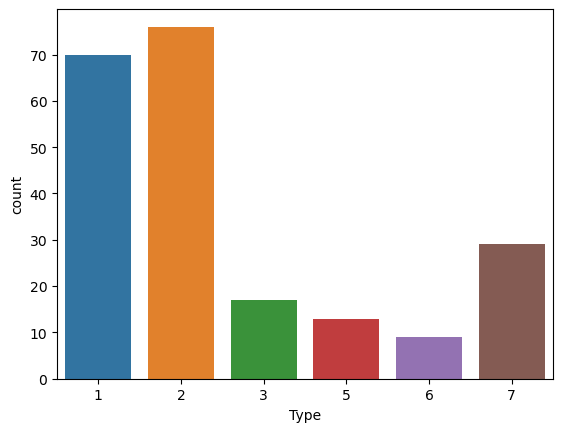

In [12]:
sns.countplot(data=df, x='Type');

# Data Preprocessing

### Identifying Duplicates

In [13]:
duplicated_rows = df[df.duplicated()]

print(duplicated_rows)

         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1


In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(213, 10)

### Identifying Missing Values

In [16]:
df.isnull()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False


In [17]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### Identifying Outliers

<Axes: >

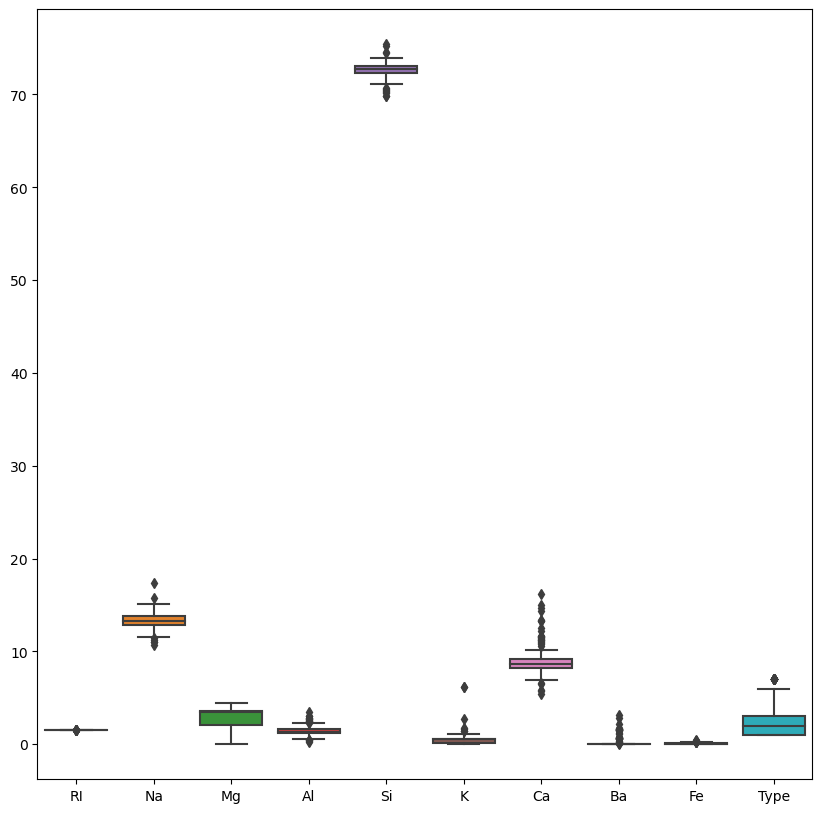

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

# Data Visualization

<Axes: >

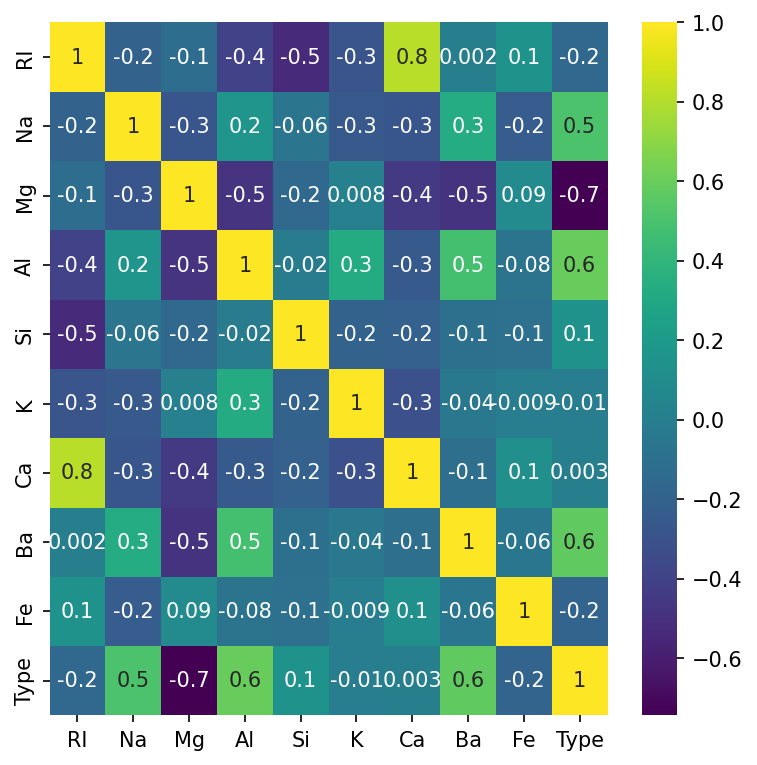

In [19]:
plt.figure(figsize=(6,6),dpi=150)
sns.heatmap(df.corr(), annot=True, cmap="viridis",fmt='.1g')

# Data Splitting

In [20]:
X = df.drop('Type',axis=1)
y = df['Type']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaled_X_train = scaler.fit_transform(X_train)

In [26]:
scaled_X_test = scaler.transform(X_test)

# Model Selection

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier()

In [29]:
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [30]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [31]:
y_pred = knn.predict(scaled_X_test)

In [32]:
y_pred

array([2, 5, 1, 2, 1, 1, 7, 7, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 7, 2, 1, 1, 5, 5, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1],
      dtype=int64)

# Model Evaluation

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [34]:
accuracy_score(y_test, y_pred)

0.5813953488372093

In [35]:
confusion_matrix(y_test, y_pred)

array([[13,  4,  0,  0,  0,  0],
       [ 3,  7,  0,  1,  0,  0],
       [ 3,  3,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  3]], dtype=int64)

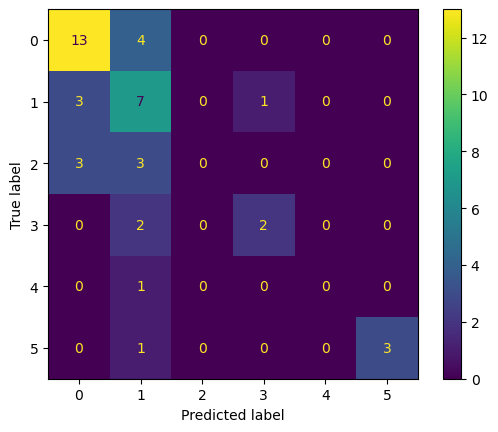

In [36]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.76      0.72        17
           2       0.39      0.64      0.48        11
           3       0.00      0.00      0.00         6
           5       0.67      0.50      0.57         4
           6       0.00      0.00      0.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.58        43
   macro avg       0.46      0.44      0.44        43
weighted avg       0.53      0.58      0.54        43



C:\Users\vijay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pipeline

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
operations = [('scaler',scaler),('knn',knn)]

In [40]:
pipe = Pipeline(operations)

# Cross Validation

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
k_values = list(range(1,30))
param_grid = {'knn__n_neighbors':k_values}

In [43]:
full_cv_classifier = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5)

In [44]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [45]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=3),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

# Model Evaluation

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [47]:
y_pred = full_cv_classifier.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.6046511627906976

In [49]:
confusion_matrix(y_test, y_pred)

array([[14,  3,  0,  0,  0,  0],
       [ 3,  7,  0,  1,  0,  0],
       [ 3,  3,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  3]], dtype=int64)

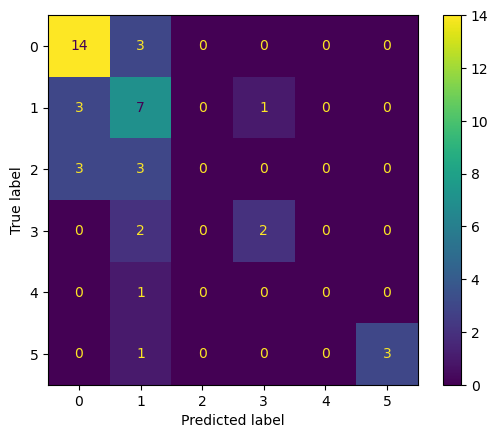

In [50]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.82      0.76        17
           2       0.41      0.64      0.50        11
           3       0.00      0.00      0.00         6
           5       0.67      0.50      0.57         4
           6       0.00      0.00      0.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.60        43
   macro avg       0.46      0.45      0.45        43
weighted avg       0.54      0.60      0.56        43



C:\Users\vijay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Deployment

In [52]:
# from joblib import dump,load

In [53]:
# dump(final_model, 'final_model.joblib')